# Question 1 - Minimum Deletions to make Array Divisible

You are given two positive integer arrays nums and numsDivide. You can delete any number of elements from nums.

\
Return the minimum number of deletions such that the smallest element in nums divides all the elements of numsDivide. If this is not possible, return -1.

\
*Note that an integer x divides y if y % x == 0.*


\
**Example 1:**

Input: nums = [2,3,2,4,3], numsDivide = [9,6,9,3,15]

Output: 2

Explanation:

The smallest element in [2,3,2,4,3] is 2, which does not divide all the elements of numsDivide.

We use 2 deletions to delete the elements in nums that are equal to 2 which makes nums = [3,4,3].

The smallest element in [3,4,3] is 3, which divides all the elements of numsDivide.

It can be shown that 2 is the minimum number of deletions needed.

\
**Example 2:**

Input: nums = [4,3,6], numsDivide = [8,2,6,10]

Output: -1

Explanation:

We want the smallest element in nums to divide all the elements of numsDivide.

There is no way to delete elements from nums to allow this.

 \
**Constraints:**

1 <= nums.length, numsDivide.length <= 105

1 <= nums[i], numsDivide[i] <= 109

In [ ]:
def minOperations(nums, numsDivide):
    nums.sort()
    gcd_value = numsDivide[0]
    for num in numsDivide[1:]:
        gcd_value = gcd(gcd_value, num)

    for i, num in enumerate(nums):
        if gcd_value % num == 0:
            return i
    return -1

def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

# User input for nums
nums = list(map(int, input("Enter the nums array (space-separated integers): ").split()))

# User input for numsDivide
numsDivide = list(map(int, input("Enter the numsDivide array (space-separated integers): ").split()))

# Call the function and print the result
result = minOperations(nums, numsDivide)
print(f"Minimum number of deletions: {result}")

# Question 2 - Find in Mountain Array

(This problem is an interactive problem.)

You may recall that an array arr is a mountain array if and only if:

\
arr.length >= 3

\
There exists some i with 0 < i < arr.length - 1 such that:

\
arr[0] < arr[1] < ... < arr[i - 1] < arr[i]

arr[i] > arr[i + 1] > ... > arr[arr.length - 1]

\
Given a mountain array mountainArr, return the minimum index such that mountainArr.get(index) == target. If such an index does not exist, return -1.

\
You cannot access the mountain array directly. You may only access the array using a MountainArray interface:

\
MountainArray.get(k) returns the element of the array at index k (0-indexed).

MountainArray.length() returns the length of the array.


\
**Example 1:**

Input: mountainArr = [1,2,3,4,5,3,1], target = 3

Output: 2

Explanation: 3 exists in the array, at index=2 and index=5. Return the minimum index, which is 2.

\
**Example 2:**

Input: mountainArr = [0,1,2,4,2,1], target = 3

Output: -1

Explanation: 3 does not exist in the array, so we return -1.

\
**Constraints:**

3 <= mountainArr.length() <= 104

0 <= target <= 109

0 <= mountainArr.get(index) <= 109

In [ ]:
# MountainArray API Interface (provided in the problem)
class MountainArray:
    def get(self, index: int) -> int:
        pass

    def length(self) -> int:
        pass

class Solution:
    def findInMountainArray(self, target: int, mountainArr: 'MountainArray') -> int:
        # Helper function for binary search in ascending order
        def binary_search_left(target, mountainArr, left, right):
            while left <= right:
                mid = (left + right) // 2
                val = mountainArr.get(mid)
                if val == target:
                    return mid
                elif val < target:
                    left = mid + 1
                else:
                    right = mid - 1
            return -1

        # Helper function for binary search in descending order
        def binary_search_right(target, mountainArr, left, right):
            while left <= right:
                mid = (left + right) // 2
                val = mountainArr.get(mid)
                if val == target:
                    return mid
                elif val > target:
                    left = mid + 1
                else:
                    right = mid - 1
            return -1

        # Step 1: Find the peak index
        n = mountainArr.length()
        left, right = 0, n - 1
        while left < right:
            mid = (left + right) // 2
            if mountainArr.get(mid) < mountainArr.get(mid + 1):
                left = mid + 1
            else:
                right = mid
        peak = left  # Peak found

        # Step 2: Search in the left increasing part
        left_result = binary_search_left(target, mountainArr, 0, peak)
        if left_result != -1:
            return left_result

        # Step 3: Search in the right decreasing part
        return binary_search_right(target, mountainArr, peak + 1, n - 1)

class MountainArray:
    def __init__(self, arr):
        self.arr = arr

    def get(self, index):
        return self.arr[index]

    def length(self):
        return len(self.arr)

# Example user input
mountainArr = MountainArray([1, 2, 3, 4, 5, 3, 1])
target = 3

# Solution object
sol = Solution()
result = sol.findInMountainArray(target, mountainArr)
print("Output:", result)  # Expected Output: 2

Output: 2


# Question 3 - Number of Substrings Containing All Three Characters

Given a string s consisting only of characters a, b and c.

Return the number of substrings containing at least one occurrence of all these characters a, b and c.


\
**Example 1:**

Input: s = "abcabc"

Output: 10

Explanation: The substrings containing at least one occurrence of the characters a, b and c are "abc", "abca", "abcab", "abcabc", "bca", "bcab", "bcabc", "cab", "cabc" and "abc" (again).

\
**Example 2:**

Input: s = "aaacb"

Output: 3

Explanation: The substrings containing at least one occurrence of the characters a, b and c are "aaacb", "aacb" and "acb".

\
**Example 3:**

Input: s = "abc"

Output: 1

\
**Constraints:**

3 <= s.length <= 5 x 10^4

s only consists of a, b or c characters.

In [ ]:
class Solution(object):
    def numberOfSubstrings(self, s):
        """
        :type s: str
        :rtype: int
        """
        count = {'a': -1, 'b': -1, 'c': -1}  # Store last seen index of 'a', 'b', 'c'
        result = 0

        for right in range(len(s)):
            count[s[right]] = right  # Update last seen index
            min_index = min(count.values())  # Get the leftmost last seen index
            result += min_index + 1  # Count valid substrings

        return result

s = input("Enter a string consisting of 'a', 'b', and 'c': ").strip()
sol = Solution()
print("Number of valid substrings:", sol.numberOfSubstrings(s))

Enter a string consisting of 'a', 'b', and 'c': abcabc
Number of valid substrings: 10


# Question 4 - Trapping Rain Water

Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.


\
**Example 1:**

\
Input: height = [0,1,0,2,1,0,1,3,2,1,2,1]

Output: 6

Explanation: The above elevation map (black section) is represented by array [0,1,0,2,1,0,1,3,2,1,2,1]. In this case, 6 units of rain water (blue section) are being trapped.

\
**Example 2:**

Input: height = [4,2,0,3,2,5]

Output: 9

\
**Constraints:**

n == height.length

1 <= n <= 2 * 104

0 <= height[i] <= 105

In [ ]:
class Solution(object):
    def trap(self, height):
        """
        :type height: List[int]
        :rtype: int
        """
        if not height or len(height) < 3:
            return 0  # No trapping possible if there are less than 3 bars

        left, right = 0, len(height) - 1
        left_max, right_max = height[left], height[right]
        water_trapped = 0

        while left < right:
            if left_max < right_max:
                left += 1
                left_max = max(left_max, height[left])
                water_trapped += max(0, left_max - height[left])
            else:
                right -= 1
                right_max = max(right_max, height[right])
                water_trapped += max(0, right_max - height[right])

        return water_trapped


height = list(map(int, input("Enter heights separated by spaces: ").split()))
sol = Solution()
print("Trapped rainwater:", sol.trap(height))

Enter heights separated by spaces: 0 1 0 2  1 0 1 3 2 1 2 1
Trapped rainwater: 6


# Question 5 - Spiral Matrix

Given an m x n matrix, return all elements of the matrix in spiral order.

\
**Example 1:**


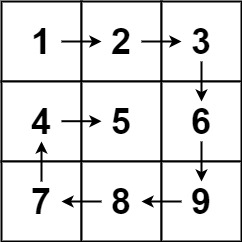

\
Input: matrix = [[1,2,3],[4,5,6],[7,8,9]]

Output: [1,2,3,6,9,8,7,4,5]

\
**Example 2:**

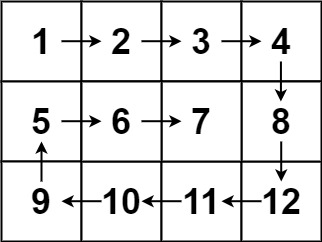

\
Input: matrix = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]

Output: [1,2,3,4,8,12,11,10,9,5,6,7]

\
**Constraints:**

m == matrix.length

n == matrix[i].length

1 <= m, n <= 10

-100 <= matrix[i][j] <= 100

In [ ]:
class Solution(object):
    def spiralOrder(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: List[int]
        """
        if not matrix or not matrix[0]:
            return []

        result = []
        top, bottom = 0, len(matrix) - 1
        left, right = 0, len(matrix[0]) - 1

        while top <= bottom and left <= right:
            # Move right
            for i in range(left, right + 1):
                result.append(matrix[top][i])
            top += 1

            # Move down
            for i in range(top, bottom + 1):
                result.append(matrix[i][right])
            right -= 1

            # Move left (if there is still a row)
            if top <= bottom:
                for i in range(right, left - 1, -1):
                    result.append(matrix[bottom][i])
                bottom -= 1

            # Move up (if there is still a column)
            if left <= right:
                for i in range(bottom, top - 1, -1):
                    result.append(matrix[i][left])
                left += 1

        return result

m, n = map(int, input("Enter matrix dimensions (m n): ").split())
matrix = []
print("Enter matrix row-wise:")
for _ in range(m):
    matrix.append(list(map(int, input().split())))

sol = Solution()
print("Spiral order:", sol.spiralOrder(matrix))

# Question 6 - Letter Combinations of a Phone Number


Given a string containing digits from 2-9 inclusive, return all possible letter combinations that the number could represent. Return the answer in any order.

A mapping of digits to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.

\
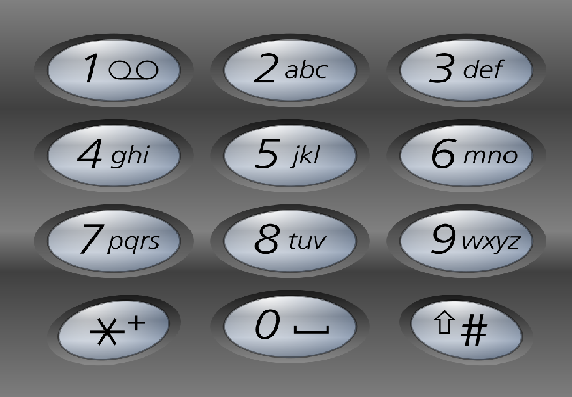

\
**Example 1:**

Input: digits = "23"

Output: ["ad","ae","af","bd","be","bf","cd","ce","cf"]

\
**Example 2:**

Input: digits = ""

Output: []

\
**Example 3:**

Input: digits = "2"

Output: ["a","b","c"]

\
**Constraints:**

0 <= digits.length <= 4

digits[i] is a digit in the range ['2', '9'].

In [ ]:
class Solution(object):
    def letterCombinations(self, digits):
        """
        :type digits: str
        :rtype: List[str]
        """
        if not digits:
            return []

        phone_map = {
            "2": "abc", "3": "def", "4": "ghi", "5": "jkl",
            "6": "mno", "7": "pqrs", "8": "tuv", "9": "wxyz"
        }

        result = []

        def backtrack(index, path):
            if index == len(digits):  # If we formed a complete combination
                result.append("".join(path))
                return

            for letter in phone_map[digits[index]]:
                backtrack(index + 1, path + [letter])  # Move to the next digit

        backtrack(0, [])
        return result

digits = input("Enter digits (2-9): ").strip()
sol = Solution()
print("Letter combinations:", sol.letterCombinations(digits))

Enter digits (2-9): 23
Letter combinations: ['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


# Question 7 - Permutation

Given an array nums of distinct integers, return all the possible permutations. You can return the answer in any order.


\
**Example 1:**

Input: nums = [1,2,3]
Output: [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]

\
**Example 2:**

Input: nums = [0,1]

Output: [[0,1],[1,0]]

\
**Example 3:**

Input: nums = [1]

Output: [[1]]

\
**Constraints:**

1 <= nums.length <= 6

-10 <= nums[i] <= 10

All the integers of nums are unique.

In [ ]:
class Solution(object):
    def permute(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        result = []

        def backtrack(path, used):
            if len(path) == len(nums):  # If a full permutation is formed
                result.append(path[:])  # Add a copy to results
                return

            for num in nums:
                if num not in used:  # Ensure uniqueness in the current permutation
                    path.append(num)
                    used.add(num)
                    backtrack(path, used)
                    path.pop()  # Undo the choice (backtrack)
                    used.remove(num)

        backtrack([], set())
        return result


nums = list(map(int, input("Enter distinct numbers separated by spaces: ").split()))
sol = Solution()
print("All permutations:", sol.permute(nums))

Enter distinct numbers separated by spaces: 1 2 3
All permutations: [[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


# Question 8 - Combination Sum

Given an array of distinct integers candidates and a target integer target, return a list of all unique combinations of candidates where the chosen numbers sum to target. You may return the combinations in any order.

The same number may be chosen from candidates an unlimited number of times. Two combinations are unique if the frequency of at least one of the chosen numbers is different.

The test cases are generated such that the number of unique combinations that sum up to target is less than 150 combinations for the given input.


\
**Example 1:**

Input: candidates = [2,3,6,7], target = 7

Output: [[2,2,3],[7]]

\
Explanation:
2 and 3 are candidates, and 2 + 2 + 3 = 7. Note that 2 can be used multiple times.

7 is a candidate, and 7 = 7.

These are the only two combinations.

\
**Example 2:**

Input: candidates = [2,3,5], target = 8

Output: [[2,2,2,2],[2,3,3],[3,5]]

\
**Example 3:**

Input: candidates = [2], target = 1

Output: []

\
**Constraints:**

1 <= candidates.length <= 30

2 <= candidates[i] <= 40

All elements of candidates are distinct.

1 <= target <= 40

In [ ]:
class Solution(object):
    def combinationSum(self, candidates, target):
        """
        :type candidates: List[int]
        :type target: int
        :rtype: List[List[int]]
        """
        result = []

        def backtrack(start, path, total):
            if total == target:  # If sum matches target, store the result
                result.append(path[:])
                return
            if total > target:  # If sum exceeds target, stop exploration
                return

            for i in range(start, len(candidates)):
                path.append(candidates[i])  # Include current number
                backtrack(i, path, total + candidates[i])  # Recur with same number
                path.pop()  # Undo choice (backtrack)

        backtrack(0, [], 0)
        return result

candidates = list(map(int, input("Enter distinct numbers separated by spaces: ").split()))
target = int(input("Enter the target sum: "))
sol = Solution()
print("Combinations:", sol.combinationSum(candidates, target))

#Question 9 - Valid Parentheses

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

\
An input string is valid if:

Open brackets must be closed by the same type of brackets.

Open brackets must be closed in the correct order.

Every close bracket has a corresponding open bracket of the same type.

\
**Example 1:**

Input: s = "()"

Output: true

\
**Example 2:**

Input: s = "()[]{}"

Output: true

\
**Example 3:**

Input: s = "(]"

Output: false

\
**Example 4:**

Input: s = "([])"

Output: true


\
**Constraints:**

1 <= s.length <= 104

s consists of parentheses only '()[]{}'.

In [ ]:
class Solution(object):
    def isValid(self, s):
        """
        :type s: str
        :rtype: bool
        """
        stack = []
        mapping = {')': '(', '}': '{', ']': '['}

        for char in s:
            if char in mapping:  # If it's a closing bracket
                top_element = stack.pop() if stack else '#'  # Pop or use dummy
                if mapping[char] != top_element:
                    return False
            else:  # If it's an opening bracket
                stack.append(char)

        return not stack  # Stack should be empty if valid

s = input("Enter a string of brackets: ")
sol = Solution()
print("Valid:" if sol.isValid(s) else "Invalid.")


Enter a string of brackets: []][())({}}{
Invalid.


#Question 10 - Generate Parentheses

Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.


\
Example 1:

Input: n = 3

Output: ["((()))","(()())","(())()","()(())","()()()"]

\
Example 2:

Input: n = 1

Output: ["()"]

In [ ]:
class Solution(object):
    def generateParenthesis(self, n):
        """
        :type n: int
        :rtype: List[str]
        """
        def backtrack(curr, open_count, close_count):
            if open_count == close_count == n:
                result.append(curr)
                return

            if open_count < n:
                backtrack(curr + "(", open_count + 1, close_count)

            if close_count < open_count:
                backtrack(curr + ")", open_count, close_count + 1)

        result = []
        backtrack("", 0, 0)
        return result

n = int(input("Enter number of pairs of parentheses: "))
sol = Solution()
print(sol.generateParenthesis(n))

#Question 11 - Wildcard Matching

Given an input string (s) and a pattern (p), implement wildcard pattern matching with support for '?' and '*' where:

\
'?' Matches any single character.

'*' Matches any sequence of characters (including the empty sequence).

The matching should cover the entire input string (not partial).


\
**Example 1:**

Input: s = "aa", p = "a"

Output: false

Explanation: "a" does not match the entire string "aa".

\
**Example 2:**

Input: s = "aa", p = "*"

Output: true

Explanation: '*' matches any sequence.

\
**Example 3:**

Input: s = "cb", p = "?a"

Output: false

Explanation: '?' matches 'c', but the second letter is 'a', which does not match 'b'.

\
**Constraints:**

0 <= s.length, p.length <= 2000

s contains only lowercase English letters.

p contains only lowercase English letters, '?' or '*'.

In [ ]:
class Solution(object):
    def isMatch(self, s, p):
        """
        :type s: str
        :type p: str
        :rtype: bool
        """
        m, n = len(s), len(p)
        dp = [[False] * (n + 1) for _ in range(m + 1)]
        dp[0][0] = True

        # Fill first row (pattern matching empty string)
        for j in range(1, n + 1):
            if p[j - 1] == '*':
                dp[0][j] = dp[0][j - 1]

        # Fill DP table
        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if p[j - 1] == s[i - 1] or p[j - 1] == '?':
                    dp[i][j] = dp[i - 1][j - 1]
                elif p[j - 1] == '*':
                    dp[i][j] = dp[i - 1][j] or dp[i][j - 1]

        return dp[m][n]

s = input("Enter string: ")
p = input("Enter pattern: ")
sol = Solution()
print(sol.isMatch(s, p))

#Question 12 - House Robber

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected and it will automatically contact the police if two adjacent houses were broken into on the same night.


Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.


\
**Example 1:**

Input: nums = [1,2,3,1]

Output: 4

Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
Total amount you can rob = 1 + 3 = 4.

\
**Example 2:**

Input: nums = [2,7,9,3,1]

Output: 12

Explanation: Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).
Total amount you can rob = 2 + 9 + 1 = 12.

\
**Constraints:**

1 <= nums.length <= 100

0 <= nums[i] <= 400

In [ ]:
class Solution:
    def rob(self, nums):
        if not nums:
            return 0
        if len(nums) == 1:
            return nums[0]

        prev1, prev2 = max(nums[0], nums[1]), nums[0]

        for i in range(2, len(nums)):
            curr = max(prev1, nums[i] + prev2)
            prev2 = prev1
            prev1 = curr

        return prev1

nums = list(map(int, input("Enter house values: ").split()))
sol = Solution()
print("Maximum amount robbed:", sol.rob(nums))

Enter house values: 2 7 9 3 1
Maximum amount robbed: 12


#Question 13 - Edit Distance

Given two strings word1 and word2, return the minimum number of operations required to convert word1 to word2.

You have the following three operations permitted on a word:

Insert a character

Delete a character

Replace a character

\
# Example 1:

Input: word1 = "horse", word2 = "ros"

Output: 3

Explanation:
horse -> rorse (replace 'h' with 'r')

rorse -> rose (remove 'r')

rose -> ros (remove 'e')

\
**Example 2:**

Input: word1 = "intention", word2 = "execution"

Output: 5

Explanation:
intention -> inention (remove 't')

inention -> enention (replace 'i' with 'e')

enention -> exention (replace 'n' with 'x')

exention -> exection (replace 'n' with 'c')

exection -> execution (insert 'u')

\
**Constraints:**

0 <= word1.length, word2.length <= 500

word1 and word2 consist of lowercase English letters.

In [ ]:
class Solution:
    def minDistance(self, word1, word2):
        m, n = len(word1), len(word2)
        dp = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            for j in range(n + 1):
                if i == 0:
                    dp[i][j] = j  # Insert all characters from word2
                elif j == 0:
                    dp[i][j] = i  # Delete all characters from word1
                elif word1[i - 1] == word2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1]
                else:
                    dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

        return dp[m][n]

# Example usage
word1 = input("Enter first word: ")
word2 = input("Enter second word: ")
sol = Solution()
print("Minimum edit distance:", sol.minDistance(word1, word2))

#Question 14 - Number of Longest Increasing Subsequence

Given an integer array nums, return the number of longest increasing subsequences.

Notice that the sequence has to be strictly increasing.


\
**Example 1:**

Input: nums = [1,3,5,4,7]

Output: 2

Explanation: The two longest increasing subsequences are [1, 3, 4, 7] and [1, 3, 5, 7].

\
**Example 2:**

Input: nums = [2,2,2,2,2]

Output: 5

Explanation: The length of the longest increasing subsequence is 1, and there are 5 increasing subsequences of length 1, so output 5.

\
**Constraints:**

1 <= nums.length <= 2000

-106 <= nums[i] <= 106

The answer is guaranteed to fit inside a 32-bit integer.

In [ ]:
class Solution:
    def findNumberOfLIS(self, nums):
        n = len(nums)
        if n == 0:
            return 0

        length = [1] * n  # Length of LIS ending at each index
        count = [1] * n   # Count of LIS ending at each index

        max_length = 1  # Overall max length of LIS

        for i in range(n):
            for j in range(i):
                if nums[j] < nums[i]:  # Increasing condition
                    if length[j] + 1 > length[i]:
                        length[i] = length[j] + 1
                        count[i] = count[j]  # Reset count to count[j]
                    elif length[j] + 1 == length[i]:
                        count[i] += count[j]  # Add to existing count

            max_length = max(max_length, length[i])

        # Count the LIS sequences of max length
        return sum(count[i] for i in range(n) if length[i] == max_length)

# Taking user input
nums = list(map(int, input("Enter space-separated integers: ").split()))

# Creating an instance of Solution and calling the function
sol = Solution()
print("Number of Longest Increasing Subsequences:", sol.findNumberOfLIS(nums))